
# <span style="color:rgb(213,80,0)">Exercise 10.3</span>

Analysis of the modified customer loyalty data in the square-root scale.


This file creates Figures A.70-A.73

## Beginning of code

In [1]:
close all
clear
load ConsLoyaltyRet.mat
Xytable=ConsLoyaltyRet(:,2:end);
nameXy=Xytable.Properties.VariableNames;
nameX=nameXy(1:end-1);
X=Xytable{:,1:end-1};
y=Xytable{:,end};
ytra=sqrt(y);
n=length(y);

% Contaminate the data
ss=Xytable.Price==10 & Xytable.NegativePublicity<0.2;
kk=3;
y(ss)=y(ss)-kk;
Xytable{ss,end}= Xytable{ss,end}-kk;
sqy=sqrt(y);
prin=0;

## Create Figure A.70

In [2]:
outFSRfan=FSRfan(y,X,'plots',0);

Total estimated time to complete LMS:  0.13 seconds 
m=1000
Total estimated time to complete LMS:  0.04 seconds 
m=1000
Total estimated time to complete LMS:  0.04 seconds 
m=1000
Total estimated time to complete LMS:  0.05 seconds 
m=1000
Total estimated time to complete LMS:  0.04 seconds 
m=1000


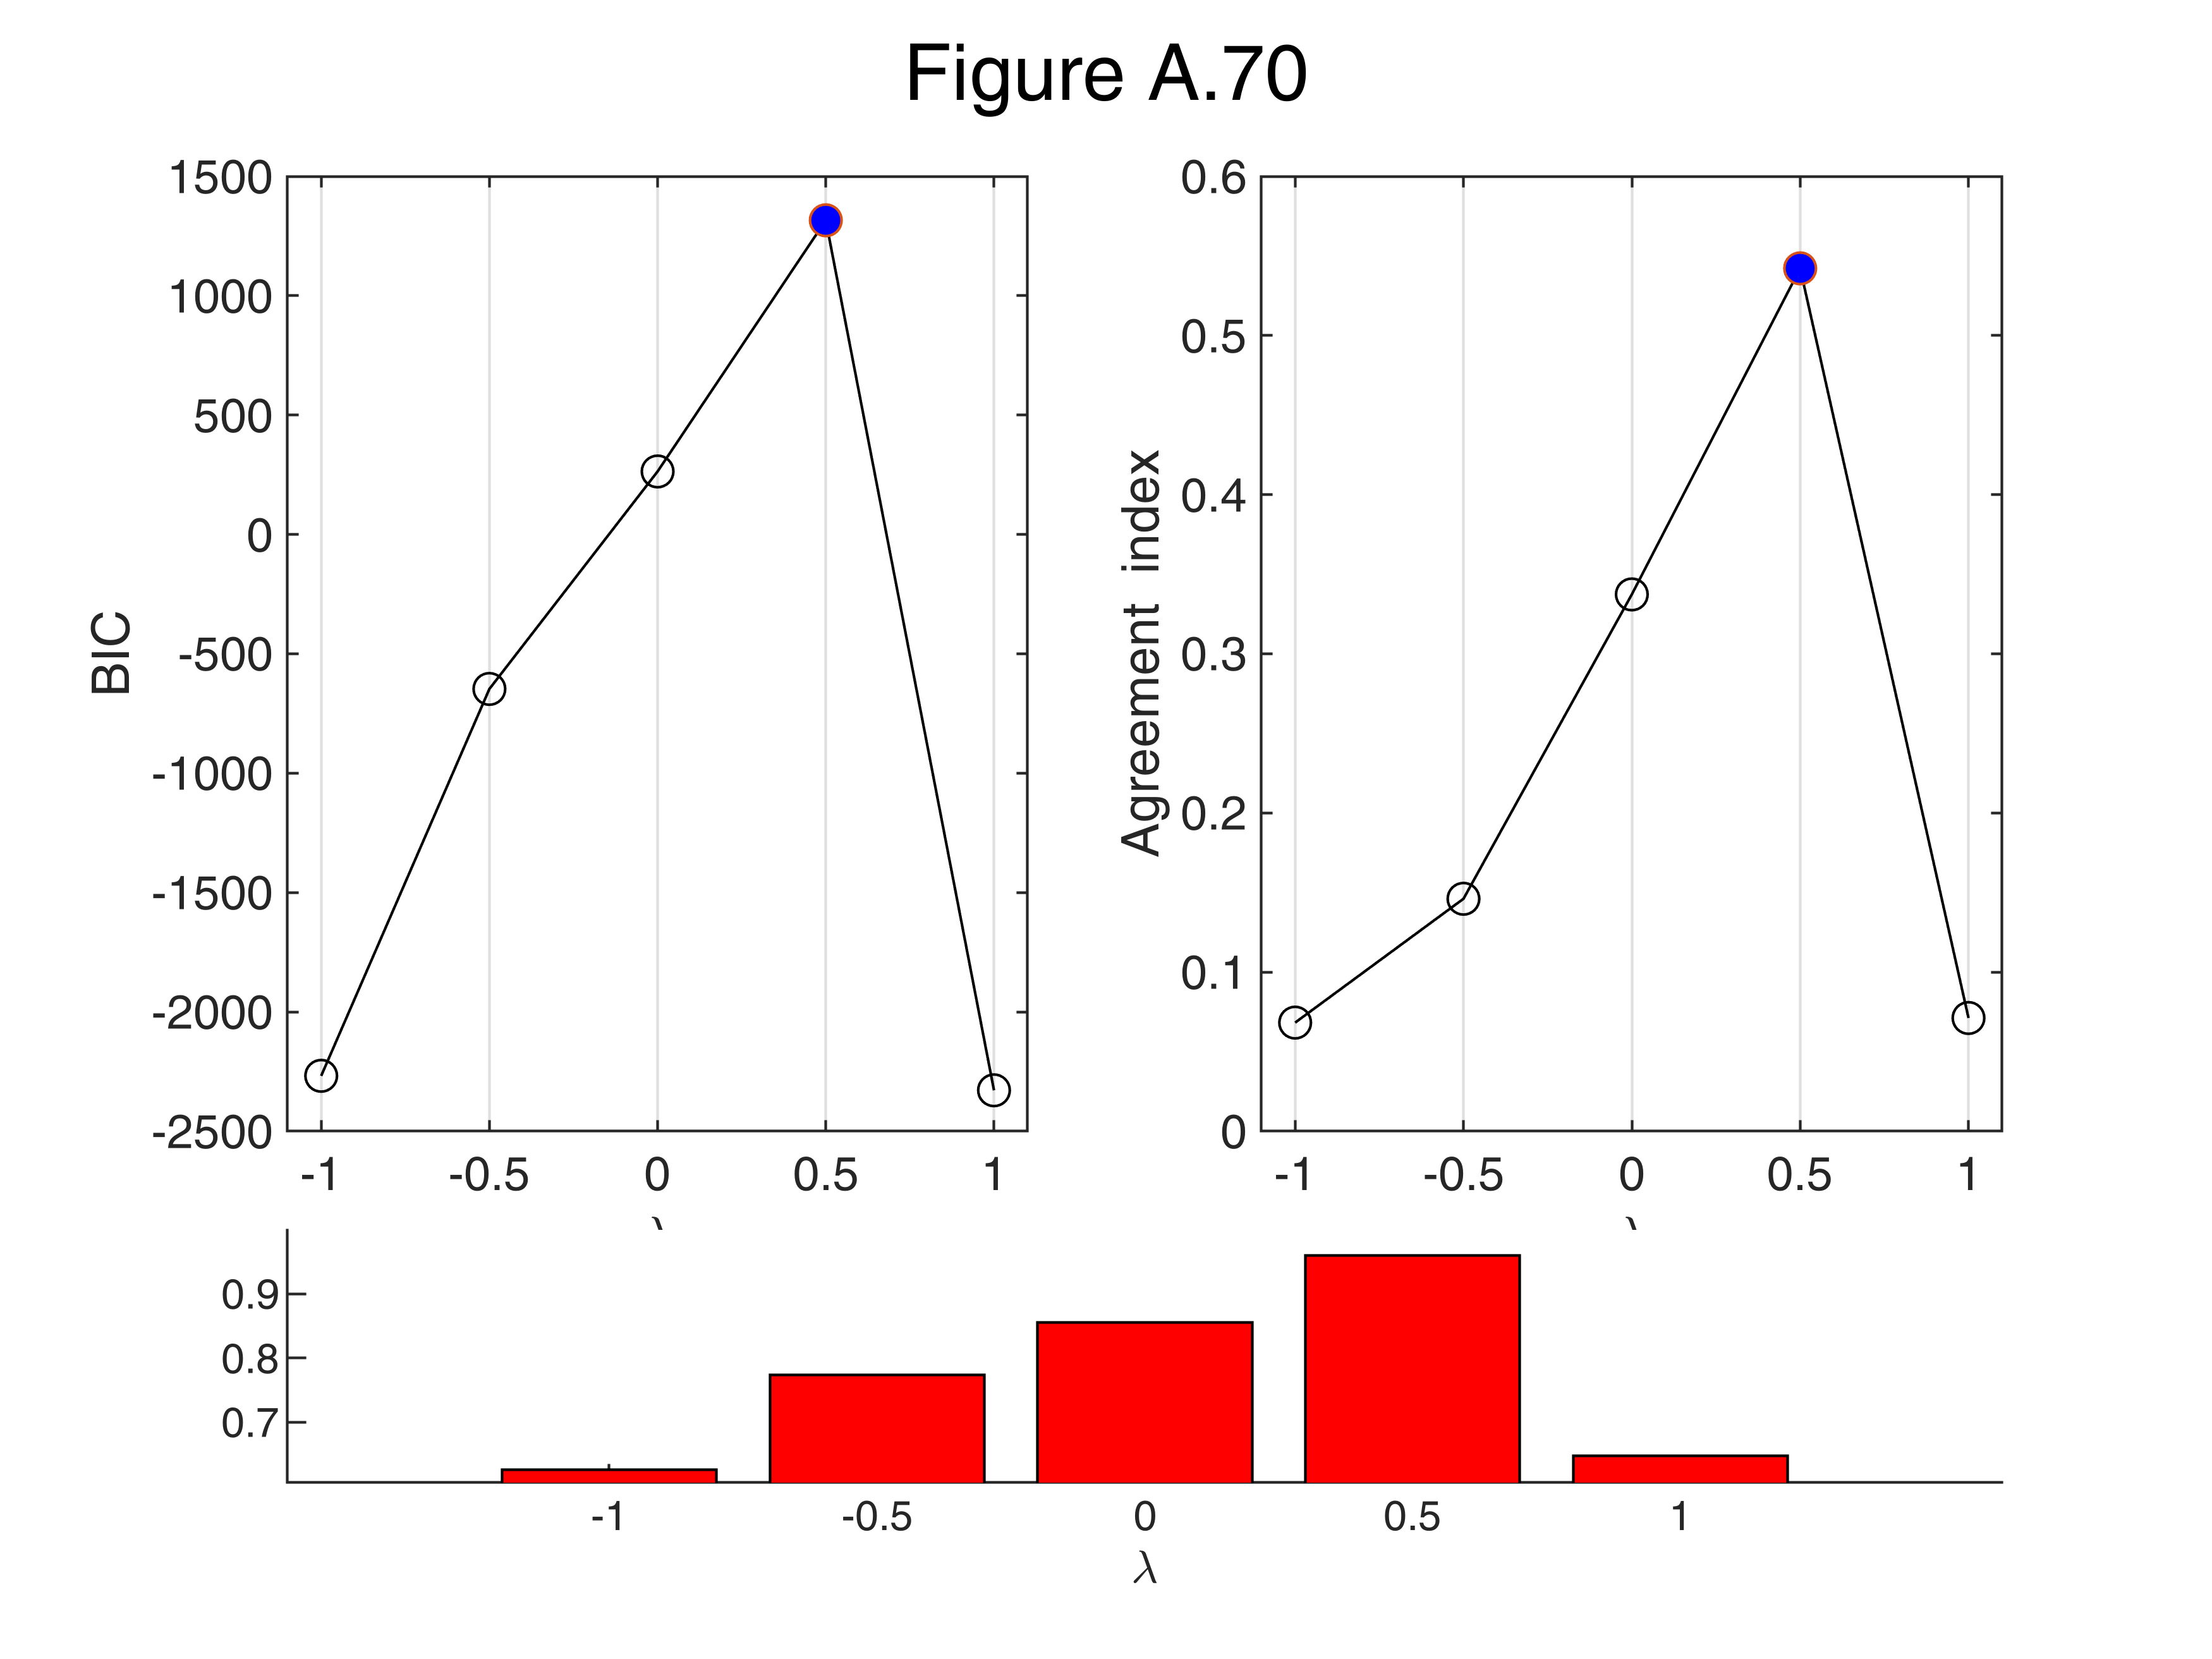

In [3]:
% Best automatic value of lambda is 0.5
outBIC=fanBIC(outFSRfan);
sgtitle('Figure A.70')
set(gcf,"Name",'Figure A.70')

## Create Figure A.71

Monitoring of res in sqrt scale LMS


In [4]:
[outLXSsq]=LXS(sqy,X,'nsamp',50000);

Total estimated time to complete LMS:  1.92 seconds

In [5]:
% Forward Search
[outsq]=FSReda(sqy,X,outLXSsq.bs);

m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
m=1500
m=1600
m=1700


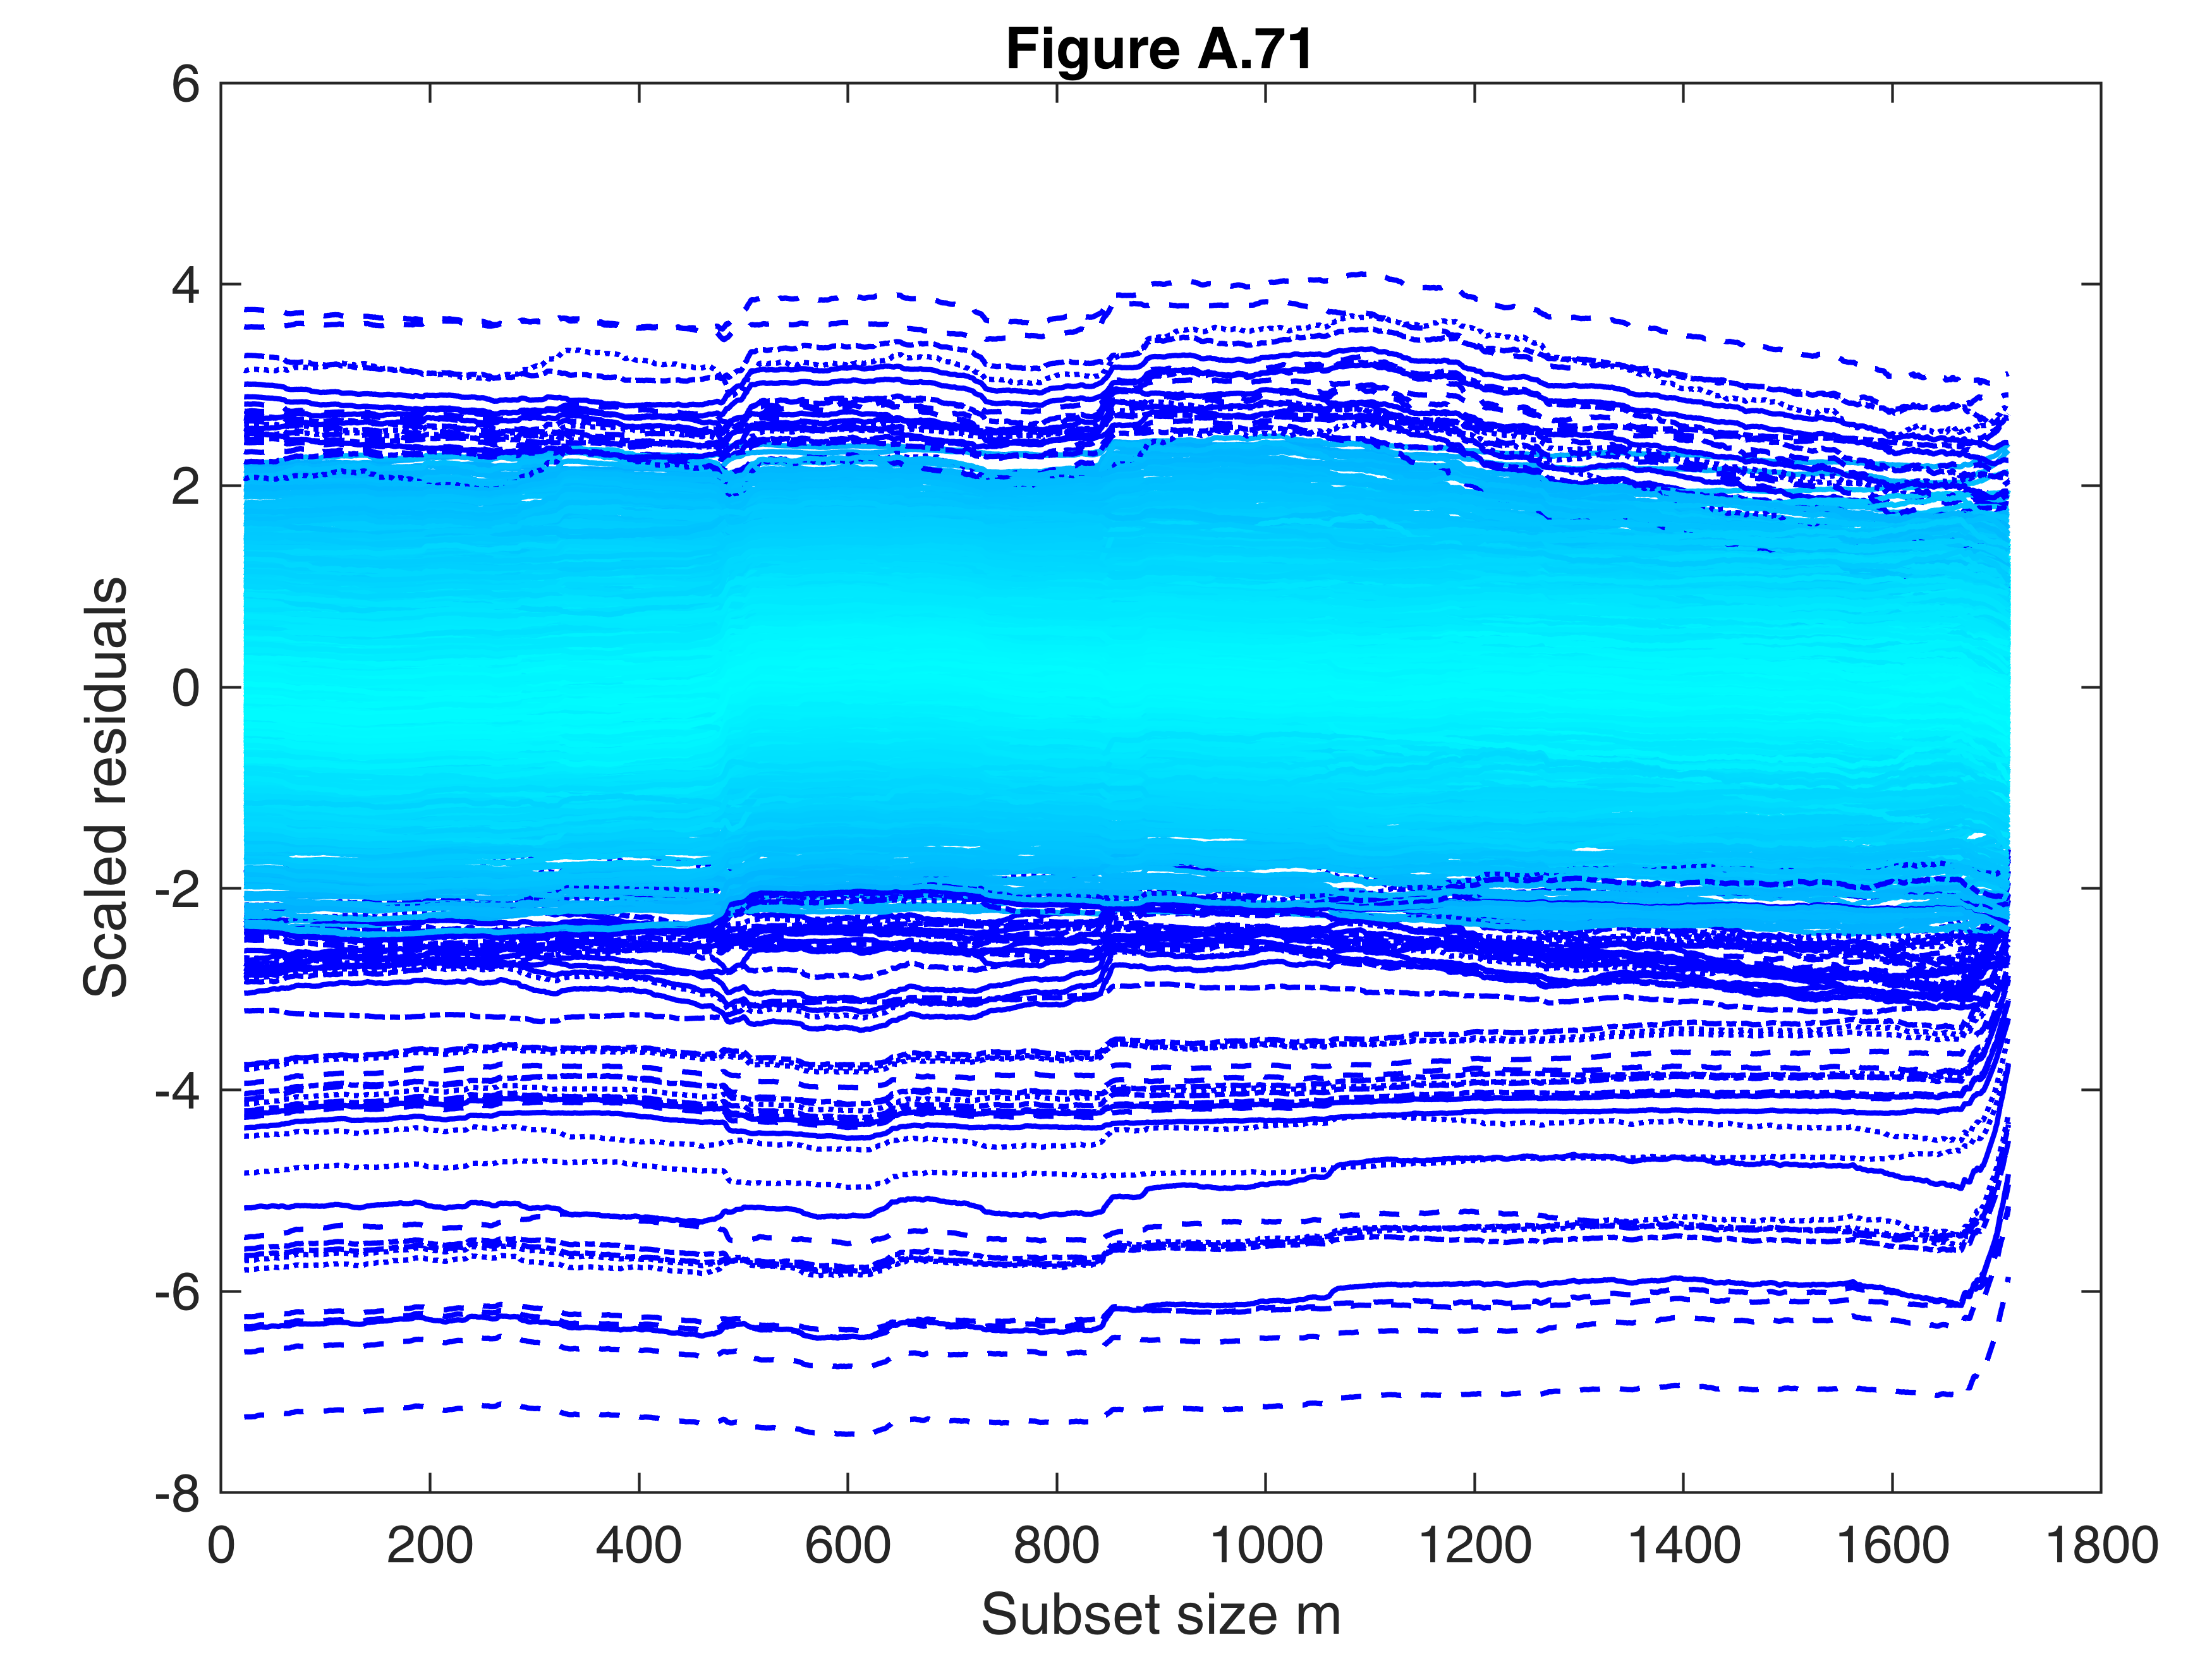

In [6]:

resfwdplot(outsq,'datatooltip','','tag','pl_resfwdini')
if prin==1
    % print to postscript
    print -depsc modCLmonressqrt.eps;
end
title('Figure A.71')
set(gcf,"Name",'Figure A.71')

In [7]:
drawnow

## Create Figure A.72

FSR in sqrt scale


In [8]:
outsqrty=FSR(sqy,X,'plots',0);

Observed curve of r_min is at least 10 times greater than 99.99% envelope
--------------------------------------------------
-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=1483 because
rmin(1483,1711)>99.99% and rmin(1482,1711)>99.99% and rmin(1484,1711)>99.99%
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=1482
Superimposition stopped because r_{min}(1579,1647)>99.9% envelope
Subsample of 1646 units is not homogeneous because the curve was above 99.99% and later it was below 1%
----------------------------------------
Probably there are two overlapping groups
Using the criterion of the maximum, the group of homogenous obs. is= 1646
----------------------------
Final output
Number of units declared as outliers=65
Summary of the exceedances
           1          99         999        9999       99999
           2       


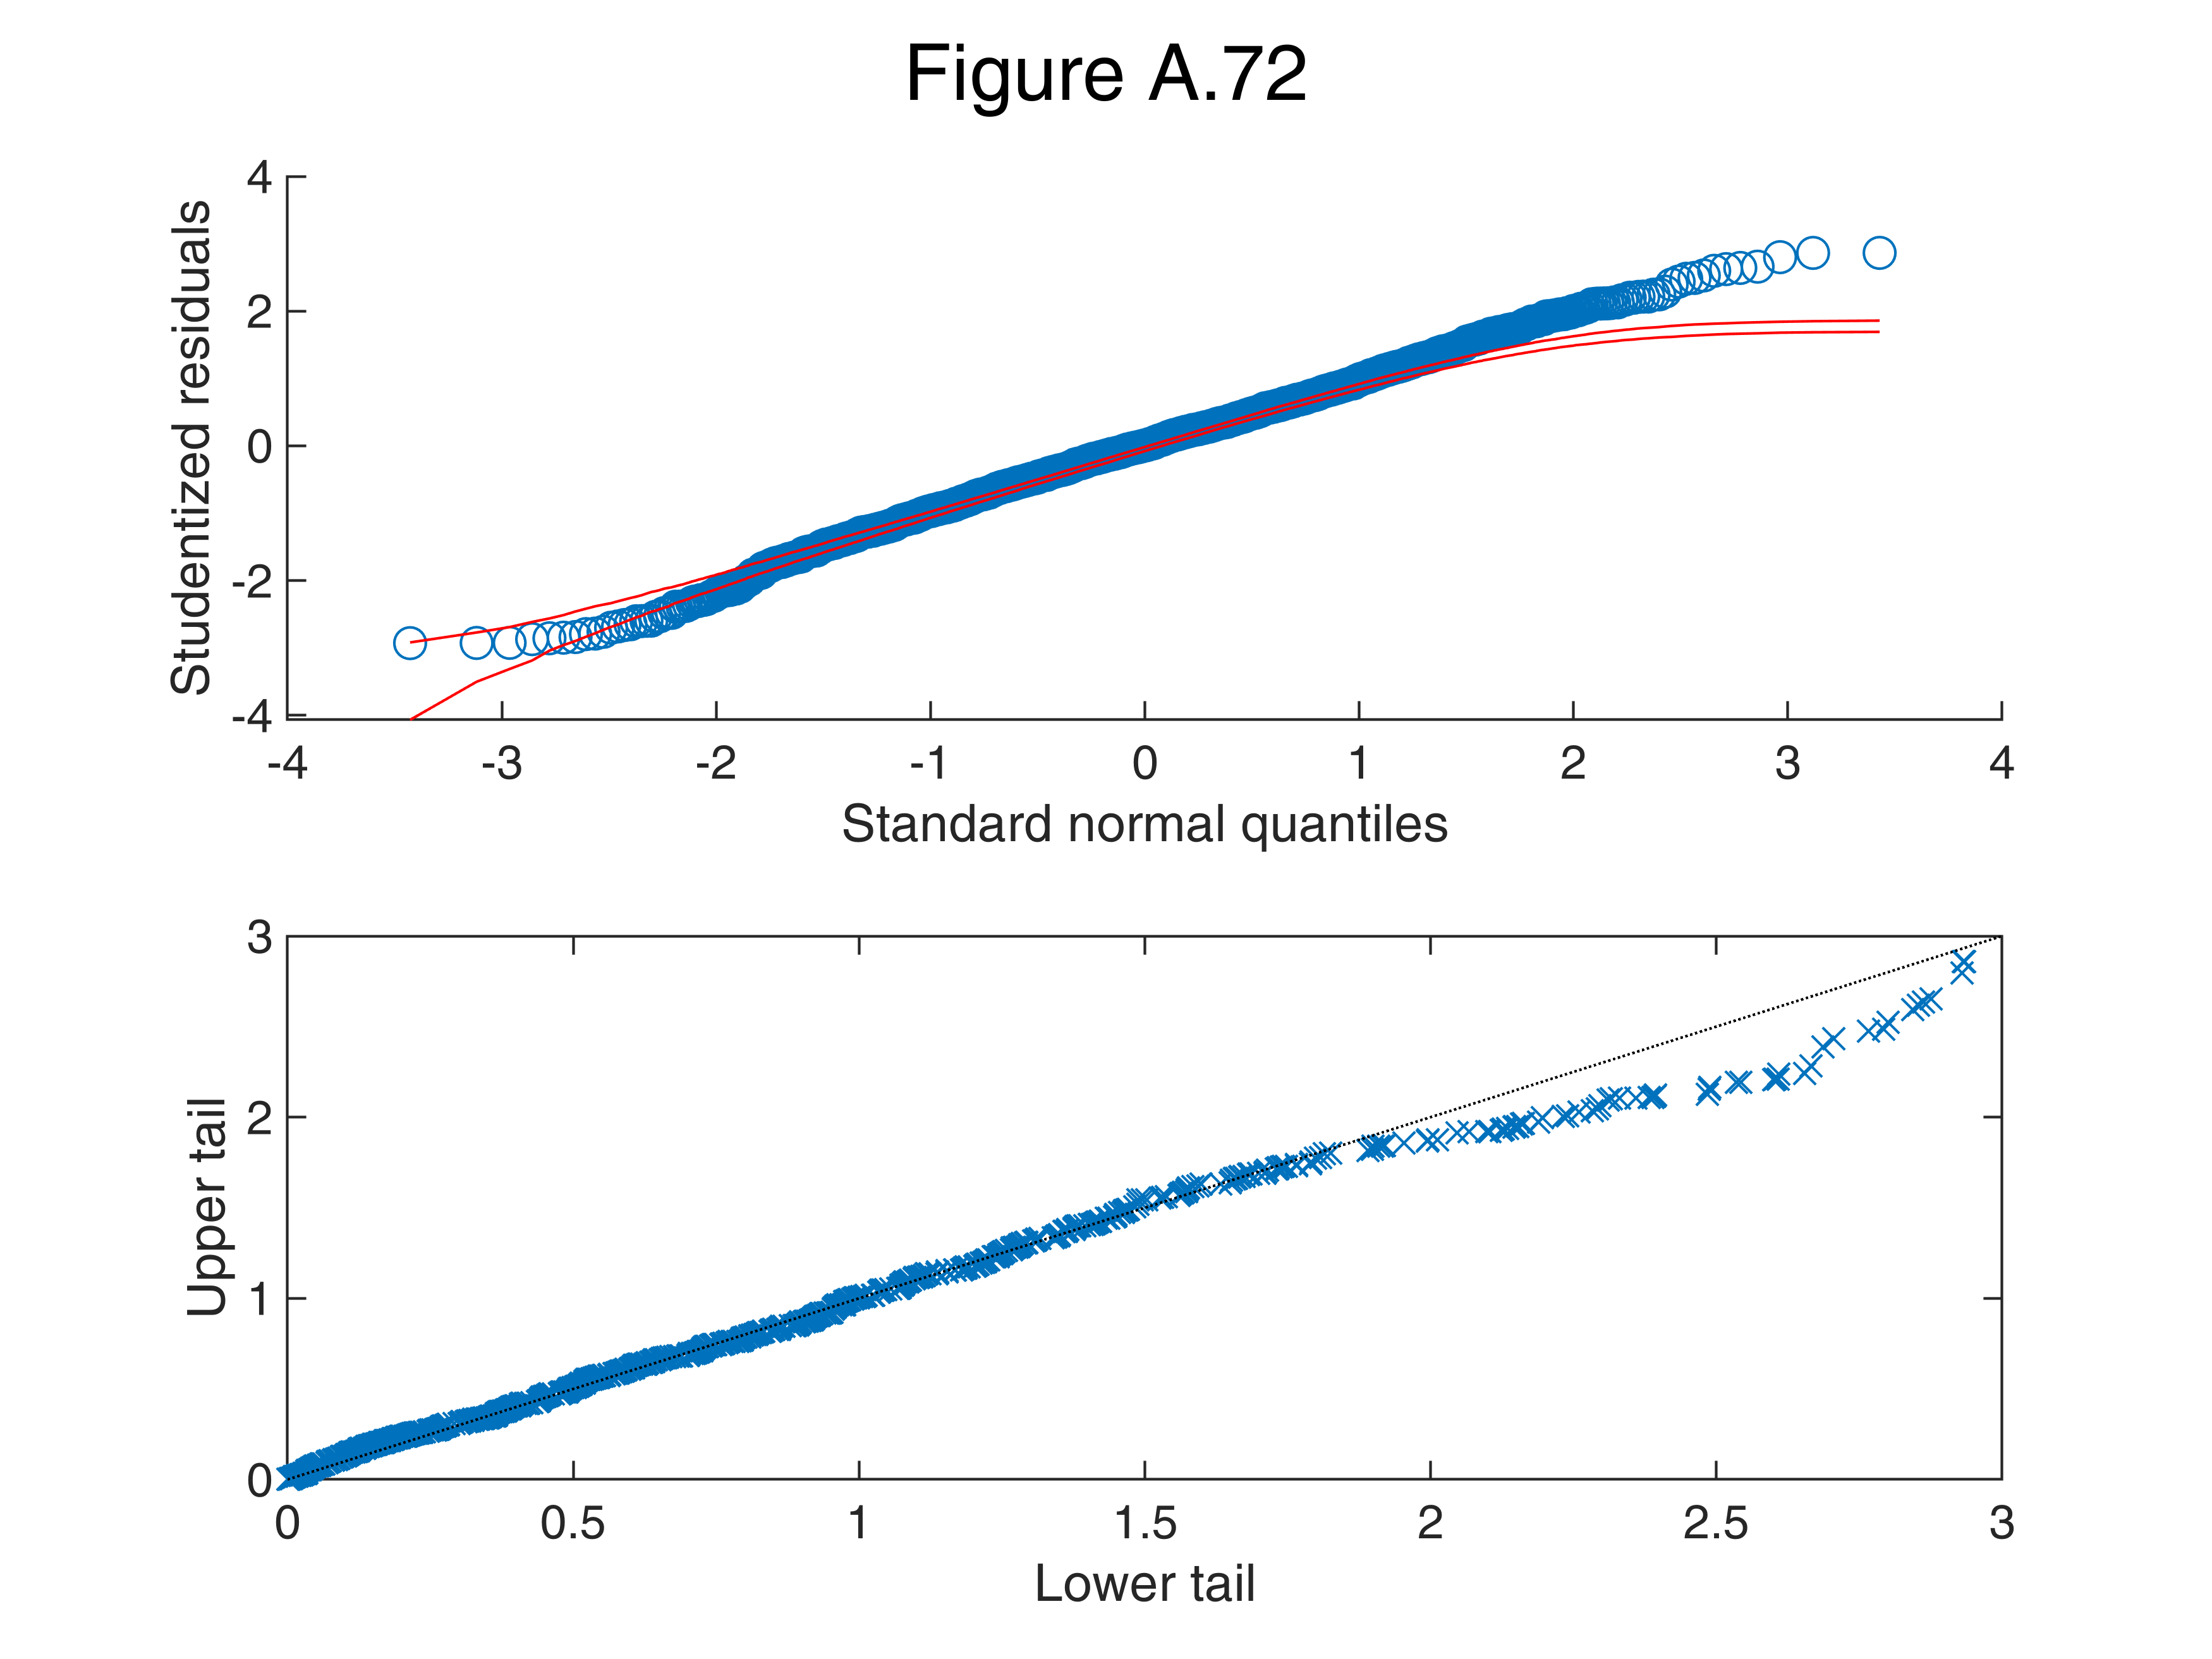

In [9]:

% plots of res in sqrt scale
mdl=fitlm(X,sqy,'Exclude',outsqrty.outliers,'VarNames',nameXy);

figure
h1=subplot(2,1,1);
res=mdl.Residuals{:,3};
qqplotFS(res,'X',X,'plots',1,'h',h1);

subplot(2,1,2)

plotResiduals(mdl,'symmetry','ResidualType','studentized')
title('')

if prin==1
    % print to postscript
    print -depsc figs\modCL8.eps;
end
sgtitle('Figure A.72')
set(gcf,"Name",'Figure A.72')

In [10]:
drawnow

## Create Figure A.73

FSRaddt in the model without the interactions sqrt scale


In [11]:
outADDt=FSRaddt(sqy,X,'plots',0);

Total estimated time to complete LMS:  0.04 seconds 
m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
m=1500
m=1600
m=1700
Total estimated time to complete LMS:  0.04 seconds 
m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
m=1500
m=1600
m=1700
Total estimated time to complete LMS:  0.04 seconds 
m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
m=1500
m=1600
m=1700
Total estimated time to complete LMS:  0.06 seconds 
m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
m=1500
m=1600
m=1700
Total estimated time to complete LMS:  0.08 seconds 
m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
m=1500
m=1600
m=1700
Total estimated time to complete LMS:  0.04 seconds 
m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
m=1500
m=1600
m=1700

In [12]:
fanplotFS(outADDt,'highlight',outsqrty.outliers)

Steps of entry of selected units in Deletion t statistics  for X{1}
        1589         571
        1597         822
        1621        1193
        1626         248
        1643         367
        1644         280
        1647         904
        1648         919
        1649         957
        1650        1218
        1651         320
        1652         767
        1653         597
        1657        1642
        1659         525
        1660         531
        1662        1280
        1663         274
        1664         635
        1666         408
        1667         330
        1668         775
        1669         862
        1670        1174
        1671         672
        1672          22
        1673         549
        1674        1134
        1675          21
        1676         347
        1677           8
        1678         578
        1679          41
        1680           9
        1681           7
        1682         390
        1683          33
       


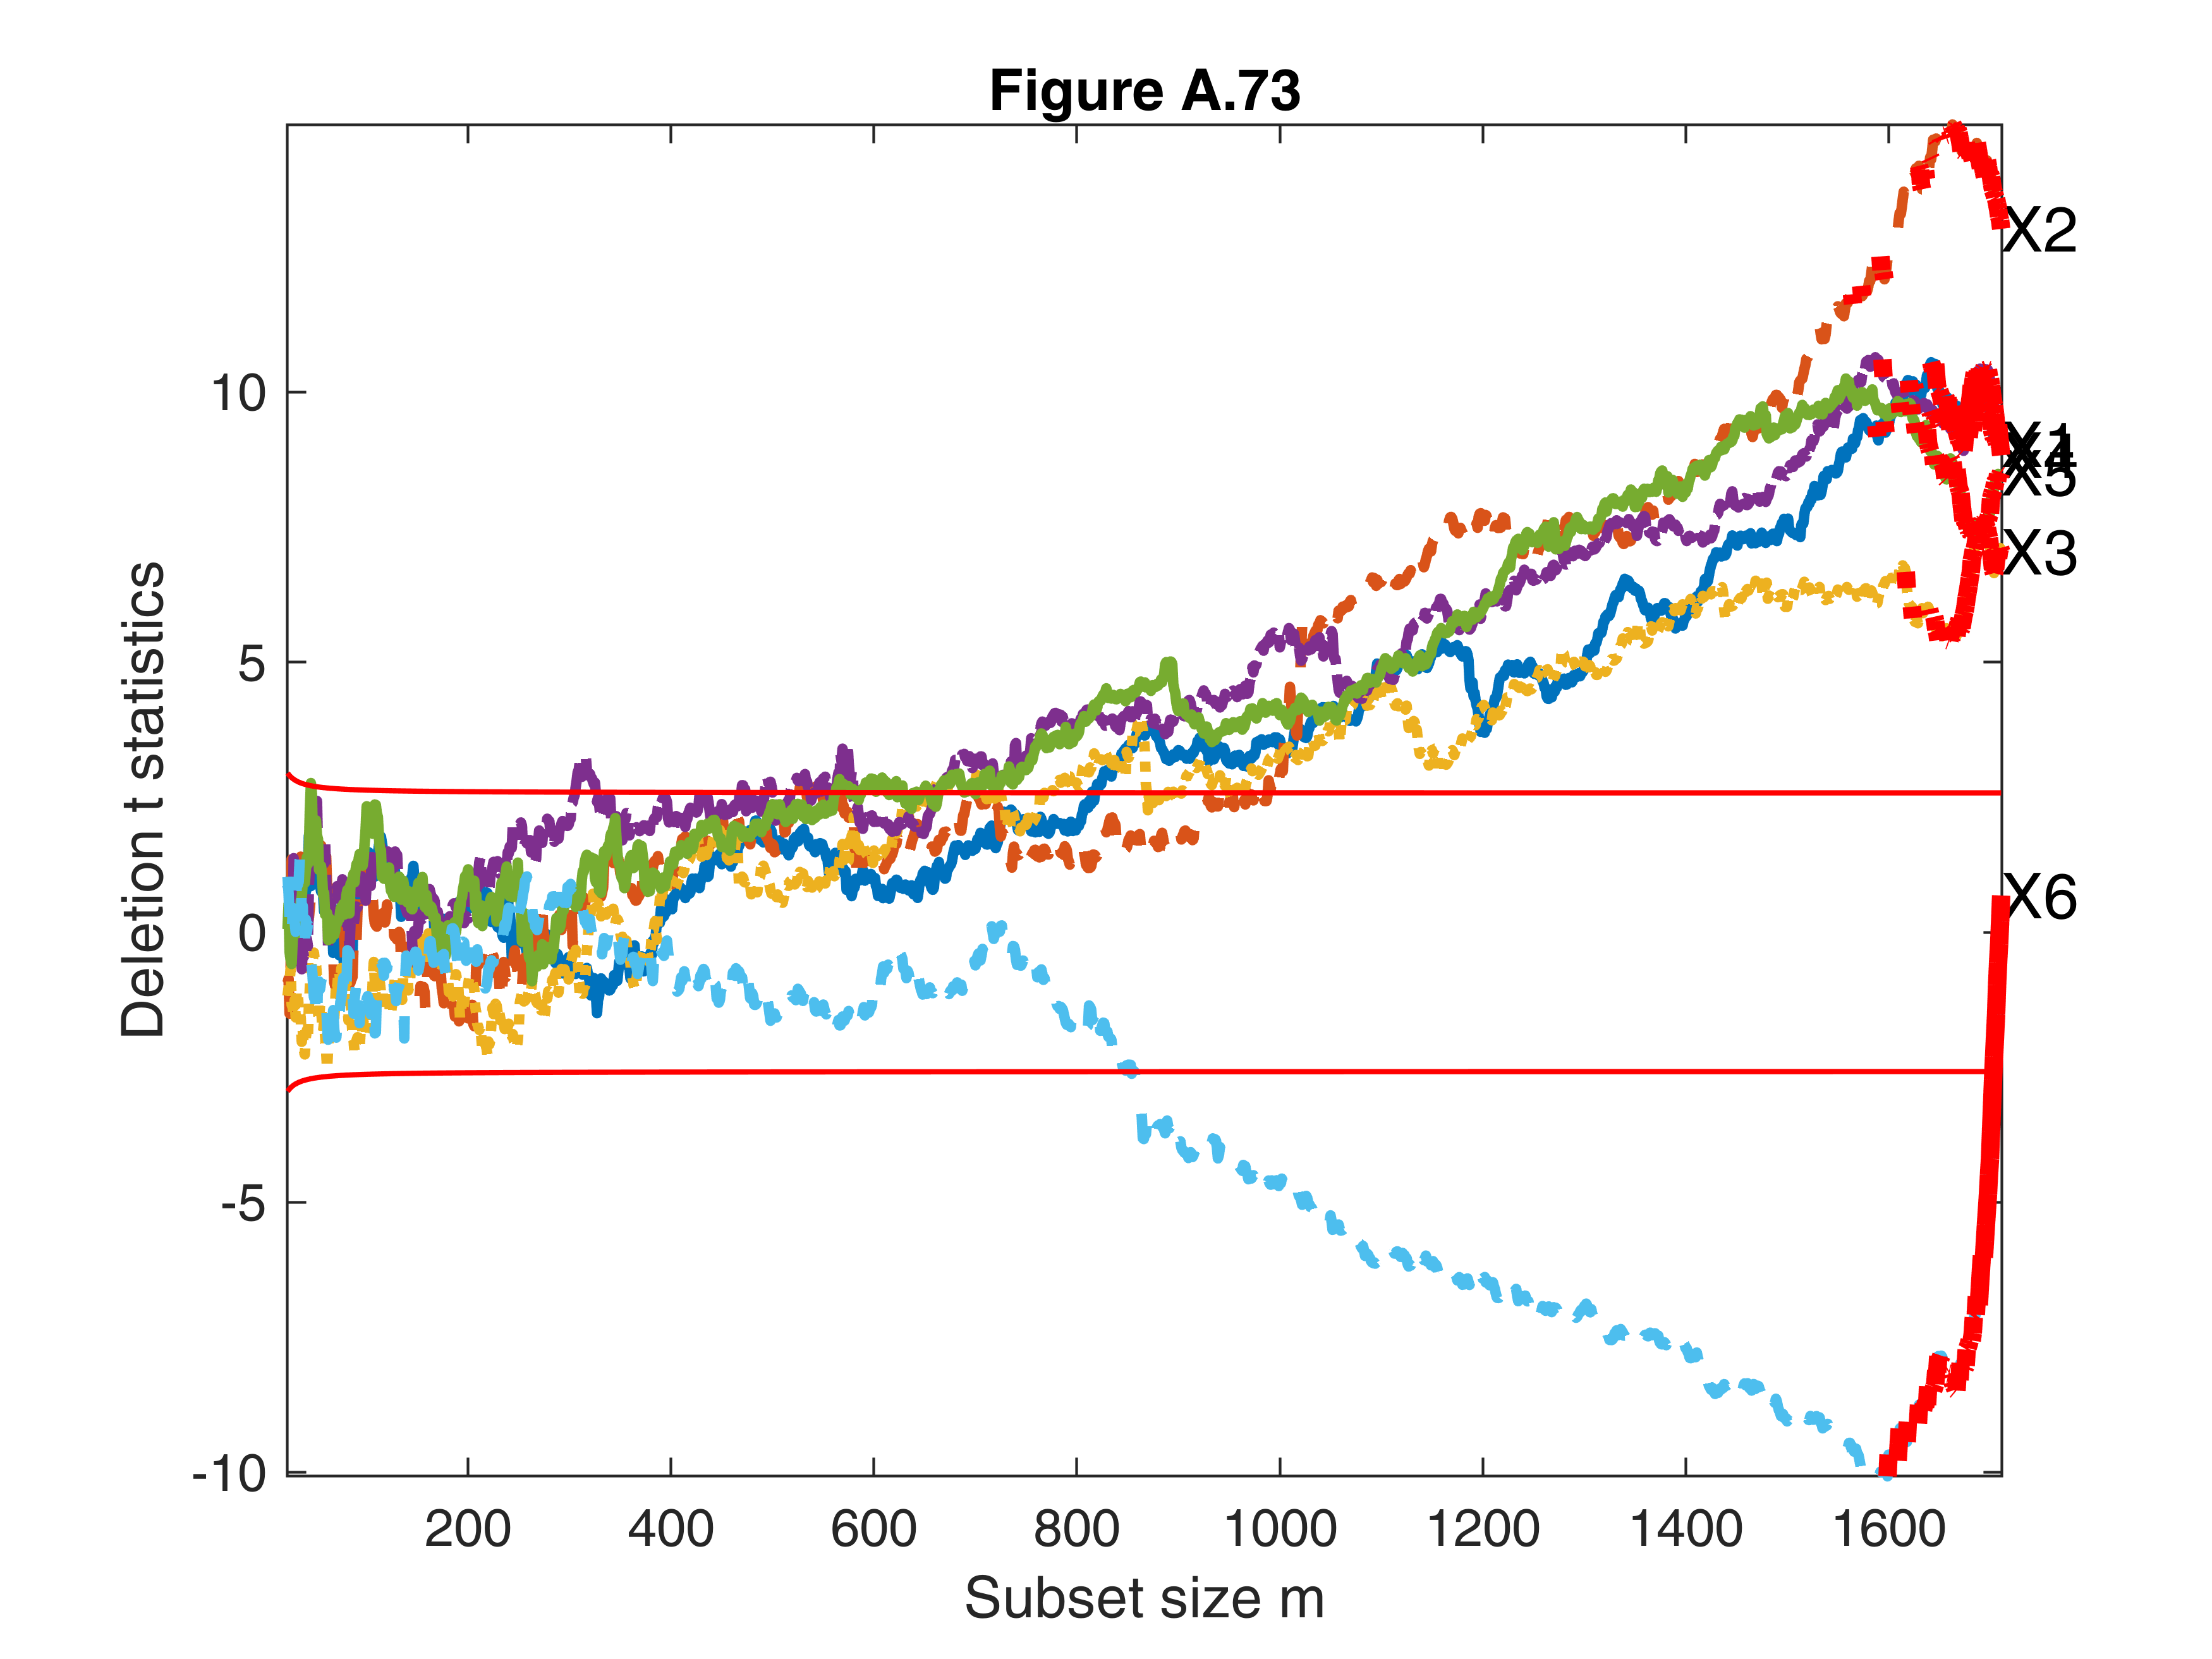

In [13]:
title('')
if prin==1
    % print to postscript
    print -depsc modCL6sqrt.eps;
end
title('Figure A.73')
set(gcf,"Name",'Figure A.73')

In [14]:

%InsideREADME